<a href="https://colab.research.google.com/github/Debugger-Dev/ML_models/blob/main/Decision_Tree_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url="/content/drive/MyDrive/Datasets and models/Datasets/penguins_size.csv"
df = pd.read_csv(url)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [ ]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


1.Assigning 336 sex to Female after comparing with M and F class features

In [ ]:
df[df["species"]=="Gentoo"].groupby("sex").describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [ ]:
df.at[336,"sex"]="FEMALE"

In [ ]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

**Handling missing values**
1.Drop the missing values
2.

1.Drop the missing values

In [ ]:
df1=df.dropna()
df1.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df1["culmen_depth_mm"]

0      18.7
1      17.4
2      18.0
4      19.3
5      20.6
       ... 
338    13.7
340    14.3
341    15.7
342    14.8
343    16.1
Name: culmen_depth_mm, Length: 334, dtype: float64

In [ ]:
fig = px.scatter(df1,x="culmen_length_mm", y="culmen_depth_mm",color="species")
fig.show()

In [ ]:
fig = px.parallel_categories(df1)
fig.show()

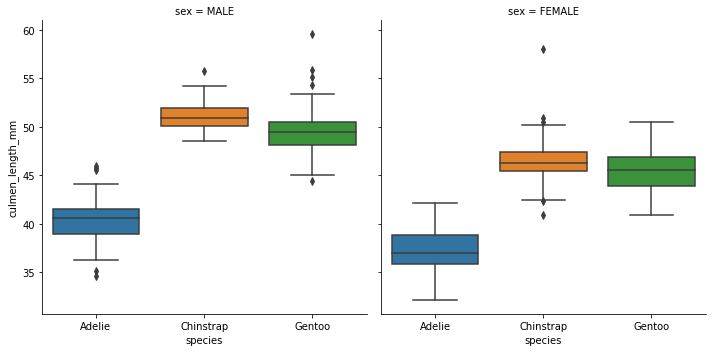

In [ ]:
sns.catplot(x = 'species', y = 'culmen_length_mm', col = 'sex', data = df, kind = 'box')

Encoding the categorical features

In [ ]:
X=pd.get_dummies(df1.drop("species",axis=1),drop_first=True)

In [ ]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [ ]:
y=df1["species"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_pred=model.predict(X_test)
model_pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97        44
   Chinstrap       0.96      0.93      0.95        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.97       111
   macro avg       0.97      0.97      0.97       111
weighted avg       0.97      0.97      0.97       111



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



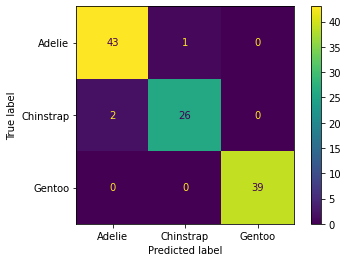

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

#as we can see it predicts 3 values wrong

In [ ]:
model.feature_importances_

array([0.32208512, 0.06883095, 0.55673439, 0.        , 0.041616  ,
       0.01073354, 0.        ])

In [ ]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=["Feature Importance"]).sort_values("Feature Importance")

,Feature Importance
body_mass_g,0.000000
sex_MALE,0.000000
island_Torgersen,0.010734
island_Dream,0.041616
culmen_depth_mm,0.068831
culmen_length_mm,0.322085
flipper_length_mm,0.556734


According to the feature importance flipper length is important feature but it misses out features which maybe more important.
As we have not tuned the hyperparametrs it misses out other important features.

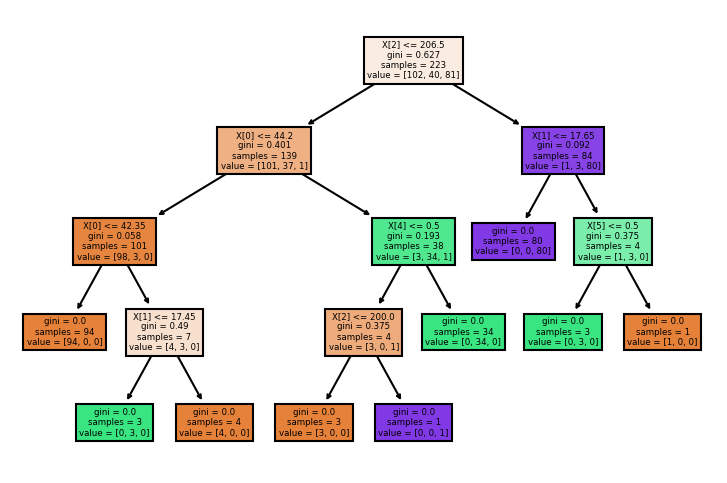

In [ ]:
from sklearn.tree import plot_tree
plt.figure(dpi=150)
plot_tree(model,filled=True);

@2nd tree model

In [ ]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)
model2_pred=pruned_tree.predict(X_test)

@3rd tree model

In [ ]:
max_leaf_node=DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_node.fit(X_train,y_train)
model3_pred=max_leaf_node.predict(X_test)

@4th tree model

In [ ]:
entropy_tree=DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(X_train,y_train)
model4_pred=entropy_tree.predict(X_test)

Define a function to draw the tree model and classification report

In [ ]:
def report_model(model):
  plt.figure(dpi=150)
  plot_tree(model,filled=True);
  print("/n")
  print(classification_report(y_test,model_pred))
  print("/n")
  plot_confusion_matrix(model,X_test,y_test)

/n
              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.96        44
   Chinstrap       0.96      0.89      0.93        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.96      0.96      0.96       111

/n


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



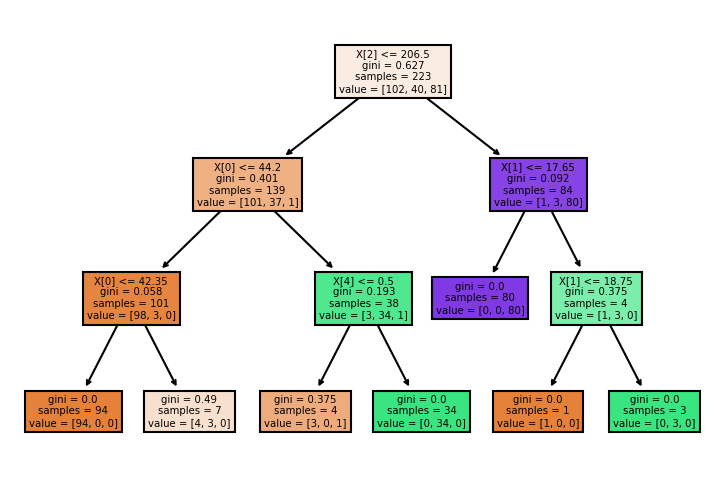

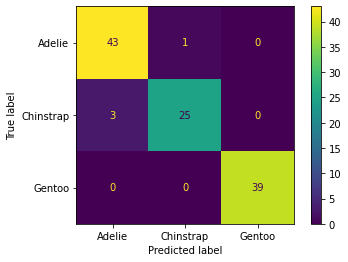

In [ ]:
report_model(pruned_tree)

/n
              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.96        44
   Chinstrap       0.96      0.89      0.93        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.96      0.96      0.96       111

/n


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



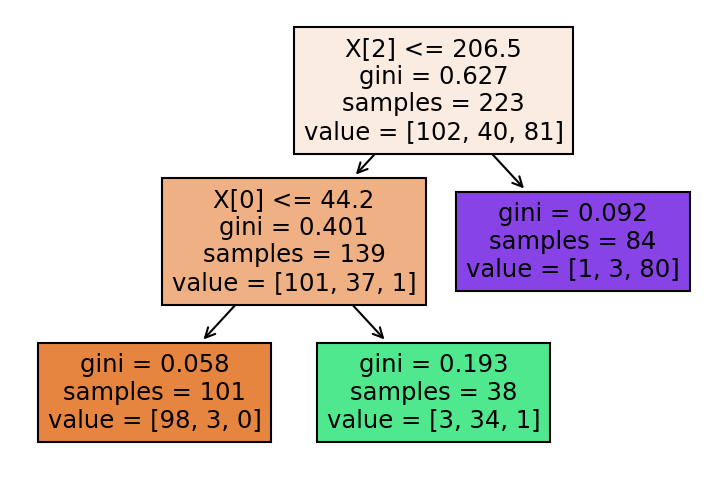

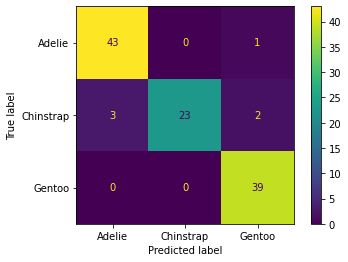

In [ ]:
report_model(max_leaf_node)

/n
              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.96        44
   Chinstrap       0.96      0.89      0.93        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.96      0.96      0.96       111

/n


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



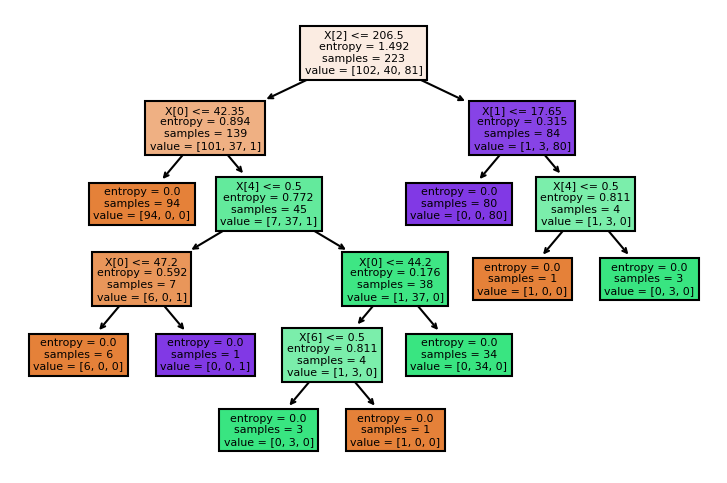

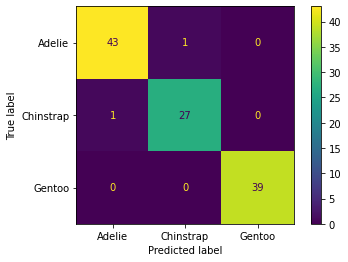

In [ ]:
report_model(entropy_tree)

As we can see the classification report shows same result but thats not correct,as for pruned tree the accuracy should be low
We need to execute in different notebook get the correct result